<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
امید به زندگی
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
امید به زندگی یا متوسط طول عمر
(به انگلیسی: Life Expectancy)
یک شاخص آماری است که نشان می‌دهد اعضای یک
جامعه به‌طور میانگین چقدر عمر می‌کنند، یا به عبارت دیگر، انتظار می‌رود چقدر عمر کنند. اطلاعات بیشتر درباره‌ی امید به زندگی را می‌توانید در ویکی‌پدیا مطالعه کنید.
در این تمرین شما با مجموعه داده ای کار میکنید که برخی از ویژگی های هر کشور و داده های آماری مانند میزان واکسیناسیون و درآمد و .. افراد کشور را دریافت خواهید کرد و میزان امید به زندگی در هر کشور را پیش بینی می کنید.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌ی آموزشی مسئله دارای ۲۸۴۸ سطر و ۱۸ ستون است.
    ۱۷ ستون مربوط به متغیرهای مستقل و ستون آخر هم نشانگر متغیر وابسته مسئله است.
    <br>
    در جدول زیر توضیح هر ستون را مشاهده می‌کنید. هر سطر مربوط به اطلاعات یک کشور است که در یک سال مشخص رکورد شده است.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>


In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling
0,Burundi,2015,Developing,119927.0,94.0,9,94.0,94.0,0.7,21,31,NaN,33.681223,18.7,7.3,NaN,10.6
1,Burundi,2014,Developing,989179.0,95.0,0,95.0,95.0,0.7,22,32,7.54,312.748979,18.2,7.4,0.01,10.6
2,Burundi,2013,Developing,96186.0,96.0,0,96.0,96.0,1.0,22,32,8.30,282.755525,17.6,7.4,0.01,10.5
3,Burundi,2012,Developing,931971.0,96.0,49,96.0,96.0,1.2,22,33,8.21,265.285651,17.1,7.5,0.01,10.3
4,Burundi,2011,Developing,94358.0,96.0,129,95.0,96.0,1.5,22,33,8.58,26.479973,16.6,7.6,4.16,9.9


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>


## EDA

In [4]:
(train_data.isna().sum() / train_data.shape[0]) * 100

Country                  0.000000
Year                     0.000000
Status                   0.000000
Population              22.612360
Hepatitis B             19.030899
Measles                  0.000000
Polio                    0.667135
Diphtheria               0.667135
HIV/AIDS                 0.000000
infant deaths            0.000000
under-five deaths        0.000000
Total expenditure        7.759831
GDP                     15.519663
BMI                      1.123596
thinness  1-19 years     1.123596
Alcohol                  6.601124
Schooling                5.617978
Life expectancy          0.000000
dtype: float64

In [5]:
# do preprocessing!
nan_value = train_data[train_data.isna().any(axis=1)]

In [6]:
train_data.groupby('Country').agg({'Year': 'count'}).sort_values(by='Year', ascending=True)

,Year
Country,
Afghanistan,16
Niger,16
Nigeria,16
Norway,16
Oman,16
...,...
Grenada,16
Guatemala,16
Guinea,16


In [7]:
nan_value = nan_value.groupby('Country').agg({'Year': 'count'}).sort_values(by='Year', ascending=True)

In [8]:
nan_value[nan_value['Year'] > 0]

,Year
Country,
Zimbabwe,1
Solomon Islands,1
Cyprus,1
Seychelles,1
Samoa,1
...,...
Somalia,16
South Sudan,16
Congo,16


In [9]:
print(train_data.nunique())
print(train_data.dtypes)

Country                  178
Year                      16
Status                     2
Population              2198
Hepatitis B               87
Measles                  917
Polio                     73
Diphtheria                80
HIV/AIDS                 200
infant deaths            183
under-five deaths        227
Total expenditure        814
GDP                     2406
BMI                      602
thinness  1-19 years     200
Alcohol                 1058
Schooling                173
Life expectancy          362
dtype: int64
Country                  object
Year                      int64
Status                   object
Population              float64
Hepatitis B             float64
Measles                   int64
Polio                   float64
Diphtheria              float64
HIV/AIDS                float64
infant deaths             int64
under-five deaths         int64
Total expenditure       float64
GDP                     float64
BMI                     float64
thinness  1-19 ye

In [10]:
train_data_encode_country = train_data.groupby('Country').agg({'Life expectancy': 'mean'}).sort_values(by='Life expectancy')

In [11]:
train_data_encode_country.reset_index(inplace=True)
train_data_encode_country.reset_index(inplace=True)

In [12]:
train_data_encode_country

,index,Country,Life expectancy
0,0,Sierra Leone,46.11250
1,1,Central African Republic,48.51250
2,2,Lesotho,48.78125
3,3,Angola,49.01875
4,4,Malawi,49.89375
...,...,...,...
173,173,France,82.21875
174,174,Switzerland,82.33125
175,175,Iceland,82.44375
176,176,Sweden,82.51875


In [13]:
numeric_df = train_data.drop(['Country', 'Status'], axis=1)

<Axes: >

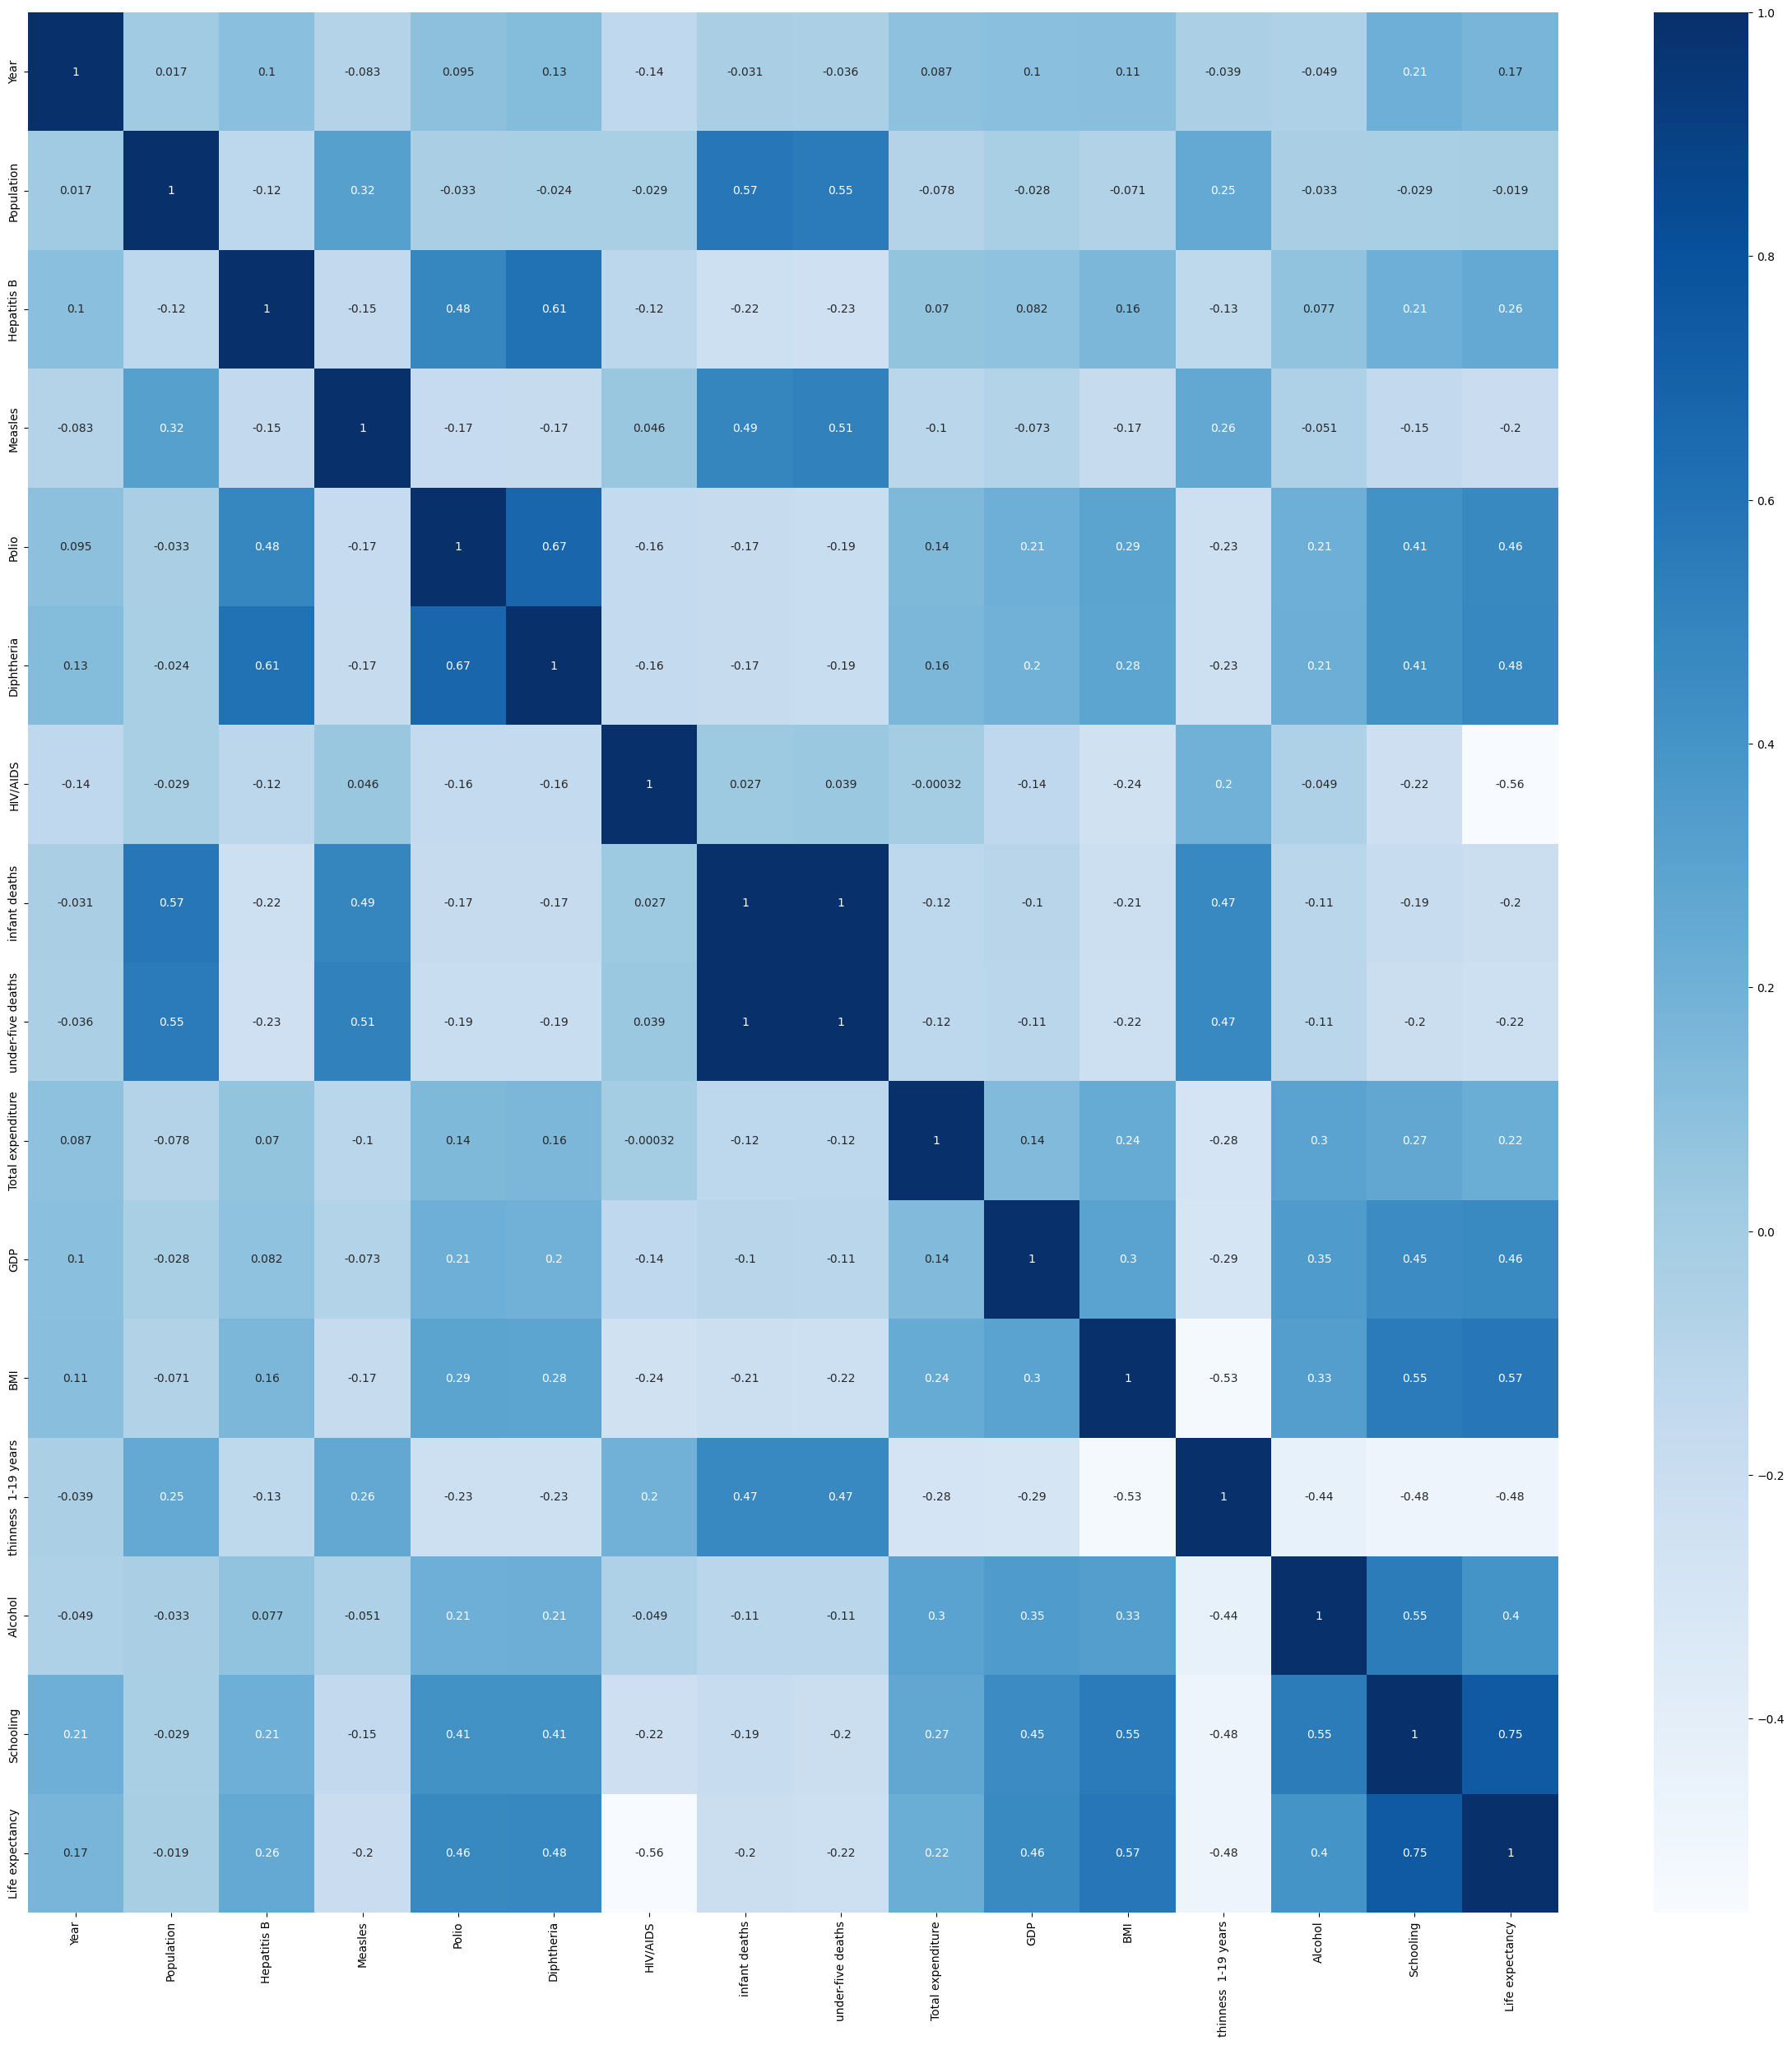

In [14]:
plt.figure(figsize=(30,30))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')

### Encode Country and Status

In [15]:
train_data_encode_country_dict = {i[1]: i[0] for i in train_data_encode_country.values}

In [16]:
train_data['Country_encoded'] = train_data['Country'].map(train_data_encode_country_dict)
# contry_classes = le.classes_
le = LabelEncoder()
le.fit(train_data['Status'])
train_data['Status_encoded'] = le.transform(train_data['Status'])
status_classes = le.classes_
train_data.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy,Country_encoded,Status_encoded
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0,30,1
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9,30,1
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9,30,1
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5,30,1
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2,30,1


In [17]:
train_data[train_data['Schooling'].isna()].groupby('Country').agg({'Year': 'count'})

,Year
Country,
Czechia,16
Côte d'Ivoire,16
Democratic People's Republic of Korea,16
Democratic Republic of the Congo,16
Republic of Korea,16
Republic of Moldova,16
Somalia,16
United Kingdom of Great Britain and Northern Ireland,16
United Republic of Tanzania,16


In [18]:
numeric_df.corr()['Schooling']

Year                    0.208911
Population             -0.028594
Hepatitis B             0.214297
Measles                -0.151299
Polio                   0.410212
Diphtheria              0.414368
HIV/AIDS               -0.220601
infant deaths          -0.186106
under-five deaths      -0.200276
Total expenditure       0.266692
GDP                     0.448379
BMI                     0.553032
thinness  1-19 years   -0.478767
Alcohol                 0.546014
Schooling               1.000000
Life expectancy         0.747482
Name: Schooling, dtype: float64

### Predict Schooling Nan Val

In [19]:
df_with_na_chooling = numeric_df[numeric_df['Schooling'].isna()]
df_without_na_chooling = numeric_df.dropna(subset=['Schooling'])

X_train_schooling = df_without_na_chooling[['Life expectancy']]
y_train_schooling = df_without_na_chooling['Schooling']
X_test_schooling = df_with_na_chooling[['Life expectancy']]

model = LinearRegression()
model.fit(X_train_schooling, y_train_schooling)
predicted_values_schooling = model.predict(X_test_schooling)

In [20]:
train_data.loc[train_data['Schooling'].isna(), 'Schooling'] = predicted_values_schooling

### Filling Nan Val according to each Country

In [21]:
train_data[train_data['Alcohol'].isna()].groupby('Country').agg({'Year': 'count'})

,Year
Country,
Algeria,1
Angola,1
Antigua and Barbuda,1
Argentina,1
Armenia,1
...,...
Venezuela (Bolivarian Republic of),1
Viet Nam,1
Yemen,1


In [22]:
median_dt_groupby_country = train_data.groupby('Country').agg({'Alcohol': 'median', 'Polio': 'median', 'Diphtheria': 'median', 'Total expenditure': 'median', 'GDP': 'mean', 'Population': 'median', 'Hepatitis B': 'median'})

In [23]:
def fill_by_country_median(row, col_name):
    if pd.isna(row[col_name]):
        row[col_name] = median_dt_groupby_country.loc[row['Country'], col_name]
        return row
    return row
    

In [24]:
train_data = train_data.apply(lambda row: fill_by_country_median(row, 'Alcohol'), axis=1)

In [25]:
train_data[train_data['Alcohol'].isna()].groupby('Country').agg({'Year': 'count'})

,Year
Country,
South Sudan,16


In [26]:
train_data.loc[train_data['Country'] == 'South Sudan', 'Alcohol'] = train_data['Alcohol'].median()

In [27]:
train_data = train_data.apply(lambda row: fill_by_country_median(row, 'Polio'), axis=1)

In [28]:
train_data[train_data['Diphtheria'].isna()].groupby('Country').agg({'Year': 'count'})

,Year
Country,
Montenegro,6
South Sudan,11
Timor-Leste,2


In [29]:
train_data = train_data.apply(lambda row: fill_by_country_median(row, 'Diphtheria'), axis=1)

In [30]:
train_data[train_data['Total expenditure'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Algeria,1
Niger,1
Nigeria,1
Norway,1
Oman,1
...,...
Zimbabwe,1
Iraq,4
South Sudan,13


In [31]:
train_data = train_data.apply(lambda row: fill_by_country_median(row, 'Total expenditure'), axis=1)

In [32]:
train_data[train_data['Total expenditure'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Democratic People's Republic of Korea,16
Somalia,16


In [33]:
print(train_data['Total expenditure'].mean())
print(train_data['Total expenditure'].median())
print(train_data['Total expenditure'].std())


5.91676846590909
5.75
2.48977170824185


In [34]:
train_data[train_data['GDP'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Sao Tome and Principe,1
Eritrea,4
Libya,4
Iraq,4
Syrian Arab Republic,8
South Sudan,8
Somalia,13
Saint Vincent and the Grenadines,16
Slovakia,16


In [35]:
train_data = train_data.apply(lambda row: fill_by_country_median(row, 'GDP'), axis=1)

In [36]:
train_data[train_data['GDP'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Bahamas,16
Venezuela (Bolivarian Republic of),16
United States of America,16
United Republic of Tanzania,16
United Kingdom of Great Britain and Northern Ireland,16
The former Yugoslav republic of Macedonia,16
Slovakia,16
Saint Vincent and the Grenadines,16
Saint Lucia,16


In [37]:
train_data[train_data['Hepatitis B'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Côte d'Ivoire,1
Panama,1
Russian Federation,1
Guyana,1
Mozambique,1
...,...
Japan,16
Hungary,16
United Kingdom of Great Britain and Northern Ireland,16


In [38]:
train_data = train_data.apply(lambda row: fill_by_country_median(row, 'Hepatitis B'), axis=1)

In [39]:
train_data[train_data['Hepatitis B'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Denmark,16
Finland,16
Hungary,16
Iceland,16
Japan,16
Norway,16
Slovenia,16
Switzerland,16
United Kingdom of Great Britain and Northern Ireland,16


In [40]:
train_data[train_data['Population'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Eritrea,4
Antigua and Barbuda,16
Oman,16
Qatar,16
Republic of Korea,16
Republic of Moldova,16
Saint Lucia,16
Saint Vincent and the Grenadines,16
Saudi Arabia,16


In [41]:
train_data = train_data.apply(lambda row: fill_by_country_median(row, 'Population'), axis=1)

In [42]:
train_data[train_data['Population'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Antigua and Barbuda,16
Oman,16
Qatar,16
Republic of Korea,16
Republic of Moldova,16
Saint Lucia,16
Saint Vincent and the Grenadines,16
Saudi Arabia,16
New Zealand,16


In [43]:
print(train_data['Population'].mean())
print(train_data['Population'].median())

12814911.461250002
1396804.5


In [44]:
numeric_df.corr()['Population'].sort_values()

Hepatitis B            -0.124750
Total expenditure      -0.078426
BMI                    -0.070635
Polio                  -0.032998
Alcohol                -0.032587
HIV/AIDS               -0.029245
Schooling              -0.028594
GDP                    -0.028052
Diphtheria             -0.024220
Life expectancy        -0.019353
Year                    0.016996
thinness  1-19 years    0.254817
Measles                 0.323543
under-five deaths       0.553922
infant deaths           0.568906
Population              1.000000
Name: Population, dtype: float64

In [45]:
numeric_dt_KNN = train_data.drop(['Country', 'Status'], axis=1)

In [46]:

(train_data.isna().sum() / train_data.shape[0]) * 100

Country                  0.000000
Year                     0.000000
Status                   0.000000
Population              22.471910
Hepatitis B              5.056180
Measles                  0.000000
Polio                    0.000000
Diphtheria               0.000000
HIV/AIDS                 0.000000
infant deaths            0.000000
under-five deaths        0.000000
Total expenditure        1.123596
GDP                     14.044944
BMI                      1.123596
thinness  1-19 years     1.123596
Alcohol                  0.000000
Schooling                0.000000
Life expectancy          0.000000
Country_encoded          0.000000
Status_encoded           0.000000
dtype: float64

In [47]:
numeric_dt_KNN.corr()['Life expectancy']

Year                    0.169144
Population             -0.019198
Hepatitis B             0.290081
Measles                -0.198178
Polio                   0.470630
Diphtheria              0.482638
HIV/AIDS               -0.559105
infant deaths          -0.201055
under-five deaths      -0.224903
Total expenditure       0.233389
GDP                     0.460937
BMI                     0.567650
thinness  1-19 years   -0.477009
Alcohol                 0.402418
Schooling               0.762690
Life expectancy         1.000000
Country_encoded         0.932973
Status_encoded         -0.483330
Name: Life expectancy, dtype: float64

#### Drop Population col

In [49]:
train_data.drop(['Population'], axis=1, inplace=True)


In [50]:
(train_data.isna().sum() / train_data.shape[0]) * 100

Country                  0.000000
Year                     0.000000
Status                   0.000000
Hepatitis B              5.056180
Measles                  0.000000
Polio                    0.000000
Diphtheria               0.000000
HIV/AIDS                 0.000000
infant deaths            0.000000
under-five deaths        0.000000
Total expenditure        1.123596
GDP                     14.044944
BMI                      1.123596
thinness  1-19 years     1.123596
Alcohol                  0.000000
Schooling                0.000000
Life expectancy          0.000000
Country_encoded          0.000000
Status_encoded           0.000000
dtype: float64

In [51]:
train_data.isna().sum()

Country                   0
Year                      0
Status                    0
Hepatitis B             144
Measles                   0
Polio                     0
Diphtheria                0
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure        32
GDP                     400
BMI                      32
thinness  1-19 years     32
Alcohol                   0
Schooling                 0
Life expectancy           0
Country_encoded           0
Status_encoded            0
dtype: int64

In [52]:
train_data.drop(train_data[train_data['BMI'].isna()].index, inplace=True)

In [53]:
train_data.drop(train_data[train_data['Total expenditure'].isna()].index, inplace=True)

In [54]:
train_data[train_data['Hepatitis B'].isna()].groupby('Country').agg({'Year': 'count'})

,Year
Country,
Denmark,16
Finland,16
Hungary,16
Iceland,16
Japan,16
Norway,16
Slovenia,16
Switzerland,16
United Kingdom of Great Britain and Northern Ireland,16


#### Filling Nan Hepatitis B based on the list of specified countries

In [55]:
country_list = ['Germany', 'France', 'Sweden', 'Netherlands', 'Austria', 'Belgium' , 'Luxembourg']

In [56]:
mean_hepatit = train_data[train_data['Country'].isin(country_list)].groupby('Country').agg({'Hepatitis B': 'median'}).mean()

In [57]:
mean_hepatit.values[0]

74.78571428571429

In [58]:
train_data['Hepatitis B'].median()

91.0

In [59]:
train_data['Hepatitis B'].fillna(mean_hepatit.values[0], inplace=True)

#### Filling Nan GDP based on GPD ranking of each country on the Internet

In [60]:
train_data[train_data['GDP'].isna()].groupby('Country').agg({'Hepatitis B': 'count'})

,Hepatitis B
Country,
Bahamas,16
Bolivia (Plurinational State of),16
Congo,16
Czechia,16
Côte d'Ivoire,16
Democratic Republic of the Congo,16
Egypt,16
Gambia,16
Iran (Islamic Republic of),16


In [81]:
high_level_country = ['Republic of Korea (South Korea)', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Iran (Islamic Republic of)']
mid_level_country = ['Egypt', 'Czechia', 'Slovakia', 'Viet Nam', 'Slovakia']
high_level_country_gdp =  train_data['GDP'].quantile(0.95)
mid_level_country_gdp = train_data['GDP'].quantile(0.55)
low_level_country_gdp = train_data['GDP'].quantile(0.20)

In [74]:
high_level_country_gdp

38486.95813099999

In [80]:
mid_level_country_gdp

1926.6241535000006

In [82]:
low_level_country_gdp

376.87639052000003

In [83]:
train_data.loc[train_data['Country'].isin(high_level_country), 'GDP'] = train_data.loc[train_data['Country'].isin(high_level_country), 'GDP'].fillna(high_level_country_gdp)

In [84]:
train_data.loc[train_data['Country'].isin(mid_level_country), 'GDP'] = train_data.loc[train_data['Country'].isin(mid_level_country), 'GDP'].fillna(mid_level_country_gdp)

In [85]:
train_data.loc[train_data['GDP'].isna()] = train_data.loc[train_data['GDP'].isna()].fillna(low_level_country_gdp)

In [86]:
train_data.dtypes

Country                  object
Year                      int64
Status                   object
Hepatitis B             float64
Measles                   int64
Polio                   float64
Diphtheria              float64
HIV/AIDS                float64
infant deaths             int64
under-five deaths         int64
Total expenditure       float64
GDP                     float64
BMI                     float64
thinness  1-19 years    float64
Alcohol                 float64
Schooling               float64
Life expectancy         float64
Country_encoded           int64
Status_encoded            int64
dtype: object

In [87]:
train_data_numeric = train_data.copy()

In [88]:
train_data_numeric.drop(['Country', 'Status', 'Country_encoded'], axis=1, inplace=True)

In [89]:
test_data.groupby('Country').agg({'Country': 'count'})

,Country
Country,
Burundi,16
China,16
Ethiopia,16
Latvia,16
Papua New Guinea,16


In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               80 non-null     object 
 1   Year                  80 non-null     int64  
 2   Status                80 non-null     object 
 3   Population            80 non-null     float64
 4   Hepatitis B           69 non-null     float64
 5   Measles               80 non-null     int64  
 6   Polio                 80 non-null     float64
 7   Diphtheria            80 non-null     float64
 8   HIV/AIDS              80 non-null     float64
 9   infant deaths         80 non-null     int64  
 10  under-five deaths     80 non-null     int64  
 11  Total expenditure     75 non-null     float64
 12  GDP                   79 non-null     float64
 13  BMI                   80 non-null     float64
 14  thinness  1-19 years  80 non-null     float64
 15  Alcohol               75 

In [91]:
test_data.isna().sum()

Country                  0
Year                     0
Status                   0
Population               0
Hepatitis B             11
Measles                  0
Polio                    0
Diphtheria               0
HIV/AIDS                 0
infant deaths            0
under-five deaths        0
Total expenditure        5
GDP                      1
BMI                      0
thinness  1-19 years     0
Alcohol                  5
Schooling                0
dtype: int64

### Filling Nan Val Test_data according to each Country

In [92]:
def fill_test_by_country_median(row, col_name):
    if pd.isna(row[col_name]):
        row[col_name] = median_test_groupby_country.loc[row['Country'], col_name]
        return row
    return row
    

In [93]:
median_test_groupby_country = test_data.groupby('Country').agg({'Alcohol': 'median', 'Polio': 'median', 'Diphtheria': 'median', 'Total expenditure': 'median', 'GDP': 'mean', 'Population': 'median', 'Hepatitis B': 'median'})

In [94]:
test_data[test_data['Alcohol'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Burundi,1
China,1
Ethiopia,1
Latvia,1
Papua New Guinea,1


In [95]:
test_data = test_data.apply(lambda row: fill_test_by_country_median(row, 'Alcohol'), axis=1)

In [96]:
test_data[test_data['Alcohol'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,


In [97]:
test_data[test_data['GDP'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Papua New Guinea,1


In [98]:
test_data = test_data.apply(lambda row: fill_test_by_country_median(row, 'GDP'), axis=1)

In [99]:
test_data[test_data['GDP'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,


In [100]:
test_data[test_data['Total expenditure'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Burundi,1
China,1
Ethiopia,1
Latvia,1
Papua New Guinea,1


In [101]:
test_data = test_data.apply(lambda row: fill_test_by_country_median(row, 'Total expenditure'), axis=1)

In [102]:
test_data[test_data['Total expenditure'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,


In [103]:
test_data[test_data['Hepatitis B'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,
Burundi,4
Ethiopia,7


In [104]:
test_data = test_data.apply(lambda row: fill_test_by_country_median(row, 'Hepatitis B'), axis=1)

In [105]:
test_data[test_data['Hepatitis B'].isna()].groupby('Country').agg({'Year': 'count'}).sort_values(by='Year')

,Year
Country,


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h3>


In [106]:
X = train_data_numeric.drop(columns=['Life expectancy'])
y = train_data_numeric['Life expectancy']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2)
X_train_poly = poly_transformer.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly, y_train)

In [ ]:
X_test_poly = poly_transformer.transform(X_test)

y_pred = model.predict(X_test_poly)
print(r2_score(y_test, y_pred))

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standard_X = scaler.transform(X)
standard_X = pd.DataFrame(standard_X, columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(standard_X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
n_features_list = [7, 8, 9, 10, 11, 12, 13, 14]
for i in n_features_list:
    
    rfe_f_selct = RFE(estimator=model, n_features_to_select=i) 
    rfe_f_selct = rfe_f_selct.fit(X_train, y_train)
    selected_features = rfe_f_selct.support_
    selected_feature_names = X_train.columns[selected_features]

    X_train_temp = X_train[selected_feature_names]
    X_test_temp = X_test[selected_feature_names]
    poly_transformer = PolynomialFeatures(degree=2)
    X_train_poly = poly_transformer.fit_transform(X_train_temp)
    
    cv = cross_val_score(model, X_train_poly, y_train, cv=15, scoring='r2')
    mean_cv_score = np.mean(cv)
    
    print(mean_cv_score)

In [ ]:
rfe_f_selct = RFE(estimator=model, n_features_to_select=13) 
rfe_f_selct = rfe_f_selct.fit(X_train, y_train)
selected_features = rfe_f_selct.support_
selected_feature_names = X_train.columns[selected_features]
print(selected_feature_names)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>r2_score</code> نام دارد.
    <br>

</font>
</p>

In [ ]:
# ghablesh standard ham shodan

In [ ]:
X_train_temp = X_train[selected_feature_names]
X_test_temp = X_test[selected_feature_names]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2)
X_train_poly = poly_transformer.fit_transform(X_train_temp)
X_test_poly = poly_transformer.fit_transform(X_test_temp)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

In [ ]:
print(r2_score(y_test, y_pred))

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>


In [ ]:
test_data['Status_encoded'] = le.transform(test_data['Status'])

In [ ]:
test_data.drop(['Country', 'Population', 'Status'], axis=1, inplace=True)

In [ ]:
X = train_data_numeric.drop(columns=['Life expectancy'])
y = train_data_numeric['Life expectancy']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)
test_data_standard = scaler.transform(test_data)

In [ ]:
X_standard = pd.DataFrame(X_standard, columns=X.columns)
test_data_standard = pd.DataFrame(test_data_standard, columns=test_data.columns)


In [ ]:
X_standard_temp = X_standard[selected_feature_names]
test_data_standard_temp = test_data_standard[selected_feature_names]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2)
X_train_poly = poly_transformer.fit_transform(X_standard_temp)
X_test_poly = poly_transformer.fit_transform(test_data_standard_temp)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly, y)
y_pred = model.predict(X_test_poly)

In [ ]:
submission = pd.DataFrame(y_pred, columns=['Life expectancy'])
submission